In [1]:
import pandas as pd #for data processing
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
#make plots visible inside the jupyter notebook
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression #calc the trend-data for later plots

#improving the plot - quality (from: http://blog.rtwilson.com/how-to-get-nice-vector-graphics-in-your-exported-pdf-ipython-notebooks/)
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('png', 'pdf')

In [2]:
city_data=pd.read_csv('City_data.csv')

In [3]:
city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [4]:
city_list=pd.read_csv('City_list.csv')

In [5]:
global_data=pd.read_csv('Global_data.csv')

In [6]:
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [7]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [8]:
pune_data=city_data[city_data['city']=='Pune']

In [9]:
pune_data.head()

,year,city,country,avg_temp
52695,1796,Pune,India,24.39
52696,1797,Pune,India,25.17
52697,1798,Pune,India,24.05
52698,1799,Pune,India,24.68
52699,1800,Pune,India,24.67


In [10]:
pune_data['avg_temp'].fillna((pune_data['avg_temp'].mean()), inplace=True)
global_data['avg_temp'].fillna((global_data['avg_temp'].mean()), inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


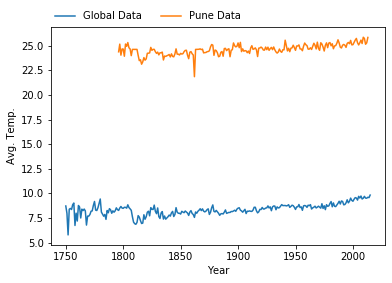

In [11]:
plt.plot(global_data['year'], global_data['avg_temp'], label = "Global Data")
plt.plot(pune_data['year'], pune_data['avg_temp'], label = "Pune Data")

plt.xlabel('Year')
# # Set the y axis label of the current axis.
plt.ylabel('Avg. Temp.')
# # Set a title of the current axes.
# plt.title('Global Temperature v/s Pune Temperature')
# # show a legend on the plot
plt.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=False)
# Display a figure.
plt.show()

In [12]:
g_data = global_data[(global_data['year'] >= 1796) & (global_data['year'] <= 2013)]
g_data.reset_index(inplace=True)
g_data.drop(columns='index',inplace=True)
g_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,avg_temp
0,1796,8.27
1,1797,8.51
2,1798,8.67
3,1799,8.51
4,1800,8.48
...,...,...
213,2009,9.51
214,2010,9.70
215,2011,9.52
216,2012,9.51


In [24]:
pune_data['Rolling'] = pune_data.rolling(10).mean()['avg_temp']
global_data['Rolling'] = global_data.rolling(10).mean()['avg_temp']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


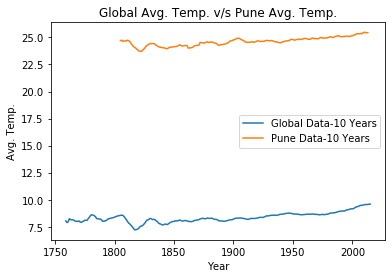

In [25]:
plt.plot(global_data['year'], global_data['Rolling'], label = "Global Data-10 Years")
plt.plot(pune_data['year'], pune_data['Rolling'], label = "Pune Data-10 Years")

plt.xlabel('Year')
# # Set the y axis label of the current axis.
plt.ylabel('Avg. Temp.')
# # Set a title of the current axes.
plt.title('Global Avg. Temp. v/s Pune Avg. Temp.')
# # show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [15]:
pune_data.reset_index(inplace=True)
pune_data.drop(columns='index',inplace=True)
pune_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,city,country,avg_temp,Rolling
0,1796,Pune,India,24.39,NaN
1,1797,Pune,India,25.17,NaN
2,1798,Pune,India,24.05,NaN
3,1799,Pune,India,24.68,NaN
4,1800,Pune,India,24.67,NaN
...,...,...,...,...,...
213,2009,Pune,India,25.87,25.418
214,2010,Pune,India,25.75,25.482
215,2011,Pune,India,25.16,25.464
216,2012,Pune,India,25.30,25.436


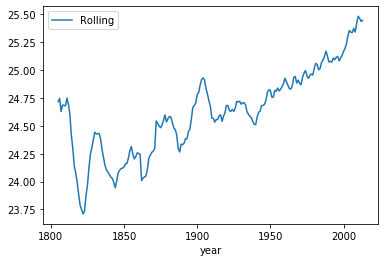

In [16]:
pune_data.plot('year','Rolling')

In [17]:
global_data['Rolling'] = global_data.rolling(7).mean()['avg_temp']
global_data.head(15)


,year,avg_temp,Rolling
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,8.078571
7,1757,9.02,8.121429
8,1758,6.74,7.944286
9,1759,7.99,8.260000


In [18]:
g_data = global_data[(global_data['year'] >= 1796) & (global_data['year'] <= 2013)]
g_data.reset_index(inplace=True)
g_data.drop(columns='index',inplace=True)
g_data


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,avg_temp,Rolling
0,1796,8.27,8.240000
1,1797,8.51,8.315714
2,1798,8.67,8.378571
3,1799,8.51,8.438571
4,1800,8.48,8.474286
...,...,...,...
213,2009,9.51,9.535714
214,2010,9.70,9.560000
215,2011,9.52,9.588571
216,2012,9.51,9.561429


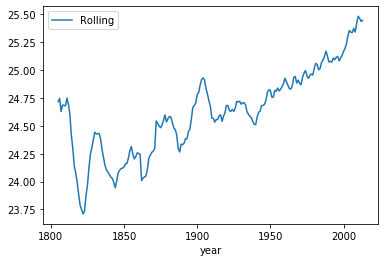

In [19]:
pune_data.plot('year','Rolling')

In [20]:
g_data['Rolling'] = g_data.rolling(10).mean()['avg_temp']
g_data.head(25)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,avg_temp,Rolling
0,1796,8.27,NaN
1,1797,8.51,NaN
2,1798,8.67,NaN
3,1799,8.51,NaN
4,1800,8.48,NaN
5,1801,8.59,NaN
6,1802,8.58,NaN
7,1803,8.50,NaN
8,1804,8.84,NaN
9,1805,8.56,8.551


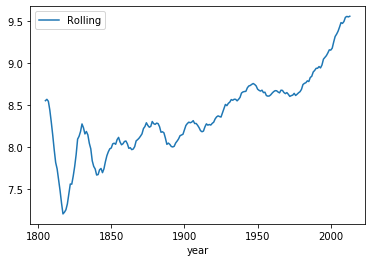

In [21]:
g_data.plot('year','Rolling')

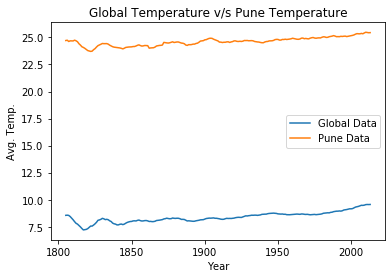

In [146]:
plt.plot(g_data['year'], g_data['Rolling'], label = "Global Data")
plt.plot(pune_data['year'], pune_data['Rolling'], label = "Pune Data")
plt.figsize=(20,16)
plt.xlabel('Year')
# # Set the y axis label of the current axis.
plt.ylabel('Avg. Temp.')
# # Set a title of the current axes.
plt.title('Global Temperature v/s Pune Temperature')
# # show a legend on the plot
plt.legend()
# Display a figure.
plt.show()